In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("HepatitisCdata.csv")

# Display dataset structure
print("Dataset Shape:", df.shape)
print("First 5 rows:")
print(df.head())


Dataset Shape: (615, 14)
First 5 rows:
   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7  


In [ ]:
# Drop the unnecessary column if it exists
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# Check column names to confirm removal
print("Columns after removal:", df.columns)


Columns after removal: Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')


In [ ]:
# Encode 'Sex' column
df['Sex'] = df['Sex'].map({'m': 0, 'f': 1})

# Encode 'Category' column
category_mapping = {
    '0=Blood Donor': 0,
    '0s=suspect Blood Donor': 1,
    '1=Hepatitis': 2,
    '2=Fibrosis': 3,
    '3=Cirrhosis': 4
}
df['Category'] = df['Category'].map(category_mapping)

# Verify encoding
print("Unique values in 'Sex':", df['Sex'].unique())
print("Unique values in 'Category':", df['Category'].unique())


Unique values in 'Sex': [0 1]
Unique values in 'Category': [0 1 2 3 4]


In [ ]:
# Check for missing values
print("Missing values before handling:\n", df.isnull().sum())

# Fill missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Confirm missing values are handled
print("Missing values after handling:\n", df.isnull().sum())


Missing values before handling:
 Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64
Missing values after handling:
 Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


In [ ]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Confirm dataset size after removing duplicates
print("Dataset shape after duplicate removal:", df.shape)


Dataset shape after duplicate removal: (615, 13)


In [ ]:
# Check if there are missing values in 'Sex'
print("Missing values in 'Sex' before handling:", df['Sex'].isnull().sum())

# Fill missing values with the most frequent value (mode)
df['Sex'].fillna(df['Sex'].mode()[0], inplace=True)

# Convert 'Sex' and 'Category' to integer type
df['Sex'] = df['Sex'].astype(int)
df['Category'] = df['Category'].astype(int)

# Verify the changes
print("Missing values in 'Sex' after handling:", df['Sex'].isnull().sum())
print("Unique values in 'Sex':", df['Sex'].unique())


Missing values in 'Sex' before handling: 0
Missing values in 'Sex' after handling: 0
Unique values in 'Sex': [0 1]


<ipython-input-8-023aa362edef>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].fillna(df['Sex'].mode()[0], inplace=True)


In [ ]:
# Check basic statistics
print("Dataset Description:\n", df.describe())

# Check class distribution in the target variable
print("Category Distribution:\n", df['Category'].value_counts())

Dataset Description:
          Category         Age         Sex         ALB         ALP         ALT  \
count  615.000000  615.000000  615.000000  615.000000  615.000000  615.000000   
mean     0.386992   47.408130    0.386992   41.620732   68.222927   28.441951   
std      1.052294   10.055105    0.487458    5.775935   25.646364   25.449889   
min      0.000000   19.000000    0.000000   14.900000   11.300000    0.900000   
25%      0.000000   39.000000    0.000000   38.800000   52.950000   16.400000   
50%      0.000000   47.000000    0.000000   41.950000   66.200000   23.000000   
75%      0.000000   54.000000    1.000000   45.200000   79.300000   33.050000   
max      4.000000   77.000000    1.000000   82.200000  416.600000  325.300000   

              AST         BIL         CHE        CHOL         CREA  \
count  615.000000  615.000000  615.000000  615.000000   615.000000   
mean    34.786341   11.396748    8.196634    5.366992    81.287805   
std     33.090690   19.673150    2.205

<ipython-input-11-ab9c26018c5d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Category'], palette="viridis")


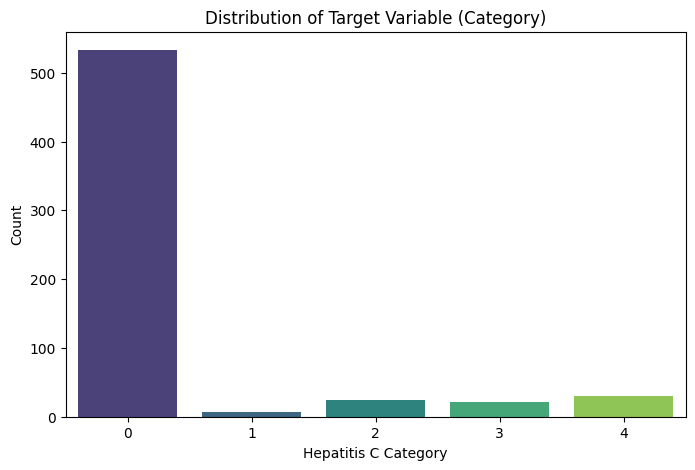

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x=df['Category'], palette="viridis")
plt.xlabel("Hepatitis C Category")
plt.ylabel("Count")
plt.title("Distribution of Target Variable (Category)")
plt.show()


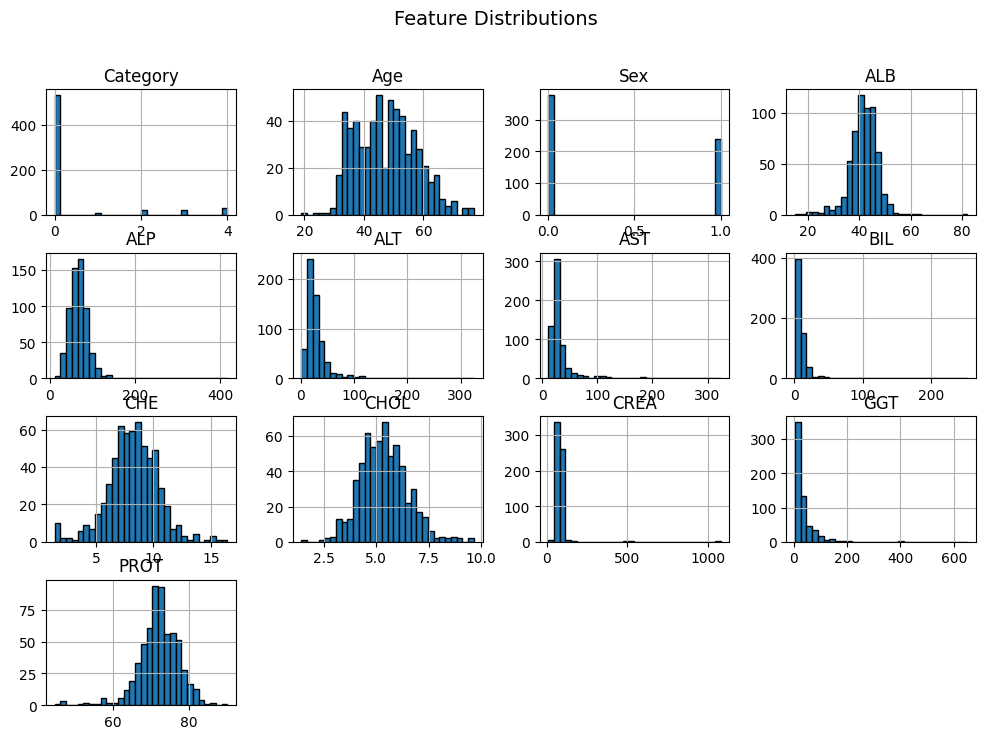

In [ ]:
# Plot histograms for numerical features
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


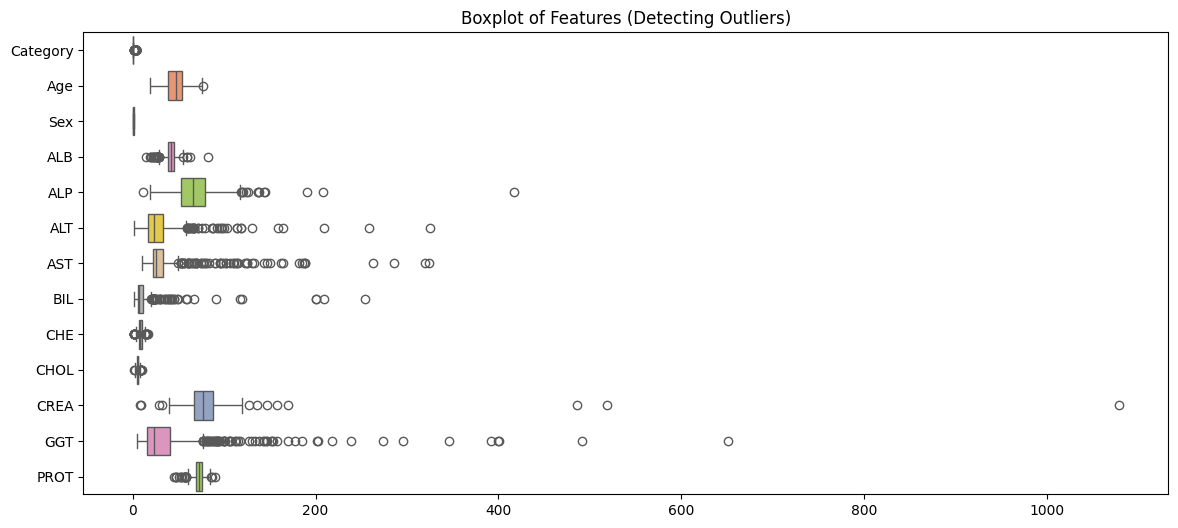

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplot of Features (Detecting Outliers)")
plt.show()


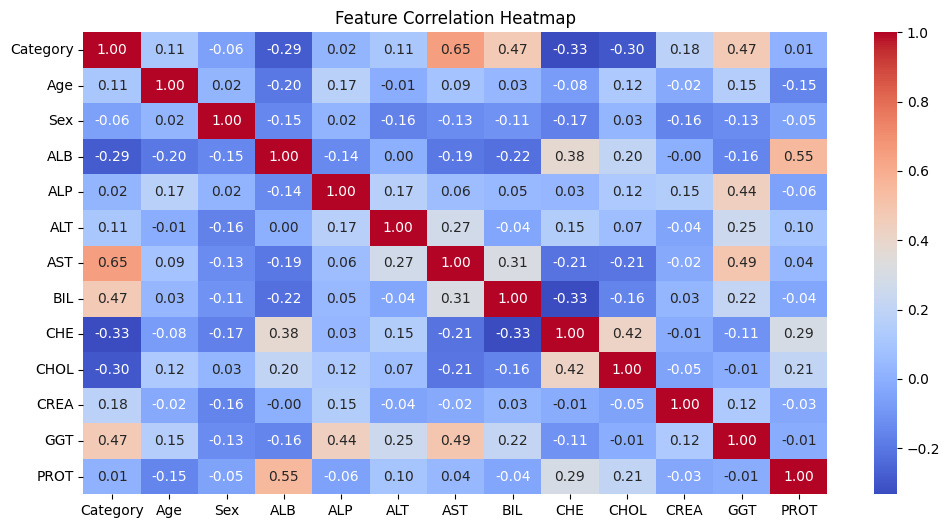

In [ ]:
import numpy as np

plt.figure(figsize=(12, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Split the features and target
X = df.drop(columns=['Category'])
y = df['Category']

# Train-test split (prior to SMOTE to avoid leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to training set
# Set k_neighbors to a value less than or equal to the smallest minority class size
sm = SMOTE(random_state=42, k_neighbors=min(Counter(y_train).values()) -1 if min(Counter(y_train).values()) > 1 else 1) #The if-else handles a case when the minority class has only one sample.
X_train, y_train = sm.fit_resample(X_train, y_train)

# Show new class distribution in training data
print("Balanced class distribution after SMOTE (training set only):", Counter(y_train))

Balanced class distribution after SMOTE (training set only): Counter({0: 437, 3: 437, 4: 437, 2: 437, 1: 437})


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm shape
print("Feature Scaling Completed!")
print("X_train_scaled Shape:", X_train_scaled.shape)
print("X_test_scaled Shape:", X_test_scaled.shape)


Feature Scaling Completed!
X_train_scaled Shape: (2185, 12)
X_test_scaled Shape: (123, 12)


In [ ]:
import numpy as np

print("NaN values in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("Infinite values in X_train_scaled:", np.isinf(X_train_scaled).sum())


NaN values in X_train_scaled: 0
Infinite values in X_train_scaled: 0


In [ ]:
import pandas as pd

# Convert X_train_scaled and X_test_scaled to DataFrame for easier handling
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_test_scaled_df = pd.DataFrame(X_test_scaled)

# Fill NaN values with median for each column
X_train_scaled_df.fillna(X_train_scaled_df.median(), inplace=True)
X_test_scaled_df.fillna(X_test_scaled_df.median(), inplace=True)

# Convert back to NumPy array
X_train_scaled = X_train_scaled_df.to_numpy()
X_test_scaled = X_test_scaled_df.to_numpy()

# Verify if NaN values are removed
print("NaN values in X_train_scaled after handling:", np.isnan(X_train_scaled).sum())
print("NaN values in X_test_scaled after handling:", np.isnan(X_test_scaled).sum())


NaN values in X_train_scaled after handling: 0
NaN values in X_test_scaled after handling: 0


In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression after handling NaN values
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train_scaled, y_train)

print("Logistic Regression Training Completed!")


Logistic Regression Training Completed!


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest Training Completed!")


Random Forest Training Completed!


In [ ]:
from xgboost import XGBClassifier

# Train XGBoost Model
xgb = XGBClassifier(eval_metric="mlogloss")
xgb.fit(X_train, y_train)

print("XGBoost Training Completed!")


XGBoost Training Completed!


In [ ]:
from sklearn.metrics import classification_report

# Make predictions
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# Print classification reports
print("Logistic Regression Performance:\n", classification_report(y_test, y_pred_log, zero_division=1))
print("Random Forest Performance:\n", classification_report(y_test, y_pred_rf, zero_division=1))
print("XGBoost Performance:\n", classification_report(y_test, y_pred_xgb, zero_division=1))


Logistic Regression Performance:
               precision    recall  f1-score   support

           0       0.97      0.89      0.92        96
           1       0.50      0.67      0.57         3
           2       0.21      0.33      0.26         9
           3       0.36      0.67      0.47         6
           4       1.00      0.67      0.80         9

    accuracy                           0.81       123
   macro avg       0.61      0.64      0.61       123
weighted avg       0.87      0.81      0.84       123

Random Forest Performance:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95        96
           1       1.00      0.33      0.50         3
           2       0.60      0.33      0.43         9
           3       0.29      0.33      0.31         6
           4       1.00      0.67      0.80         9

    accuracy                           0.87       123
   macro avg       0.76      0.53      0.60       123
weighted avg   

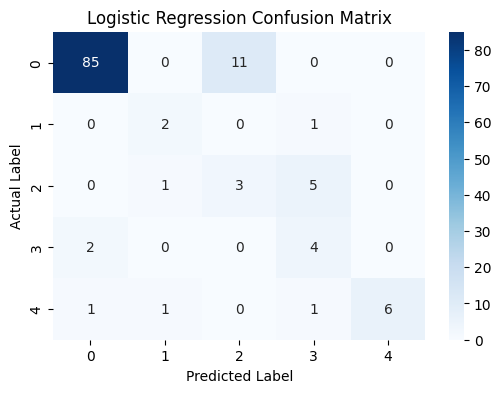

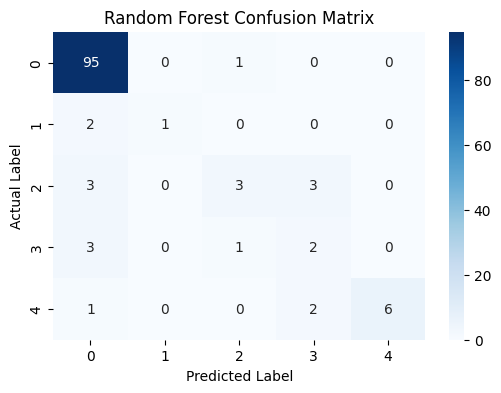

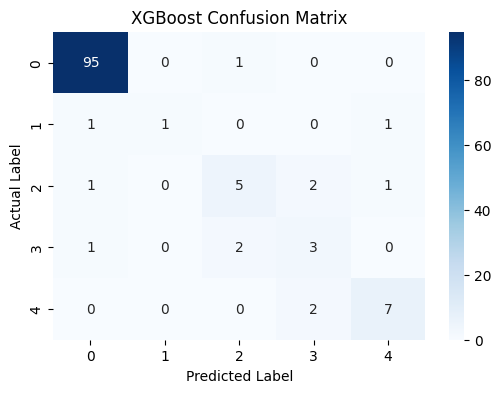

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(title)
    plt.show()

# Plot for Logistic Regression
plot_conf_matrix(y_test, y_pred_log, "Logistic Regression Confusion Matrix")

# Plot for Random Forest
plot_conf_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

# Plot for XGBoost
plot_conf_matrix(y_test, y_pred_xgb, "XGBoost Confusion Matrix")


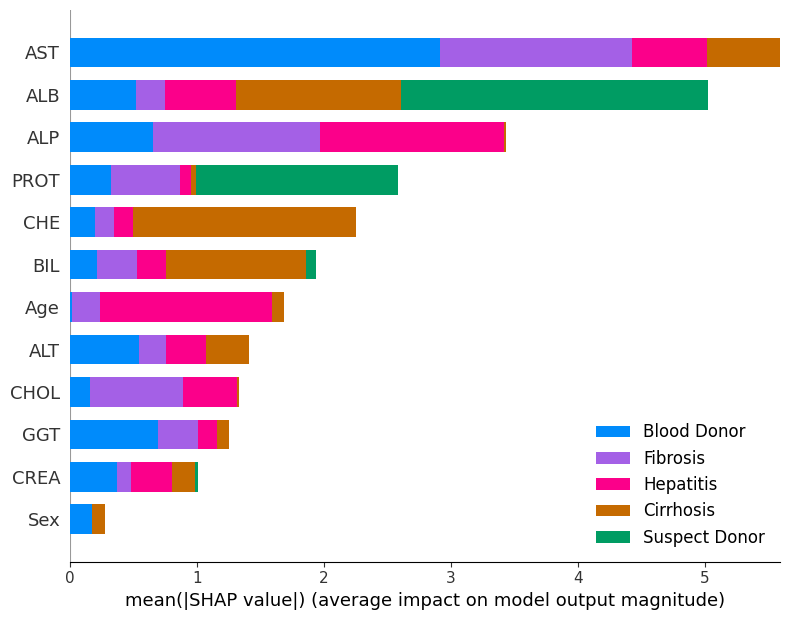

In [ ]:
import shap

# Explain model predictions using SHAP
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

# Custom class labels
custom_names = ['Blood Donor', 'Suspect Donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis']

# Plot with updated legend
shap.summary_plot(shap_values, X_test, class_names=custom_names)


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create the performance data dictionary
performance_data = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "Precision": [
        precision_score(y_test, y_pred_log, average="weighted", zero_division=1),
        precision_score(y_test, y_pred_rf, average="weighted", zero_division=1),
        precision_score(y_test, y_pred_xgb, average="weighted", zero_division=1)
    ],
    "Recall": [
        recall_score(y_test, y_pred_log, average="weighted"),
        recall_score(y_test, y_pred_rf, average="weighted"),
        recall_score(y_test, y_pred_xgb, average="weighted")
    ],
    "F1-score": [
        f1_score(y_test, y_pred_log, average="weighted"),
        f1_score(y_test, y_pred_rf, average="weighted"),
        f1_score(y_test, y_pred_xgb, average="weighted")
    ],
}

# Convert to DataFrame
performance_df = pd.DataFrame(performance_data)

# Display performance table
print("Model Performance Comparison:\n", performance_df)



Model Performance Comparison:
                  Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.813008   0.872664  0.813008  0.835620
1        Random Forest  0.869919   0.868346  0.869919  0.858563
2              XGBoost  0.902439   0.904534  0.902439  0.899057


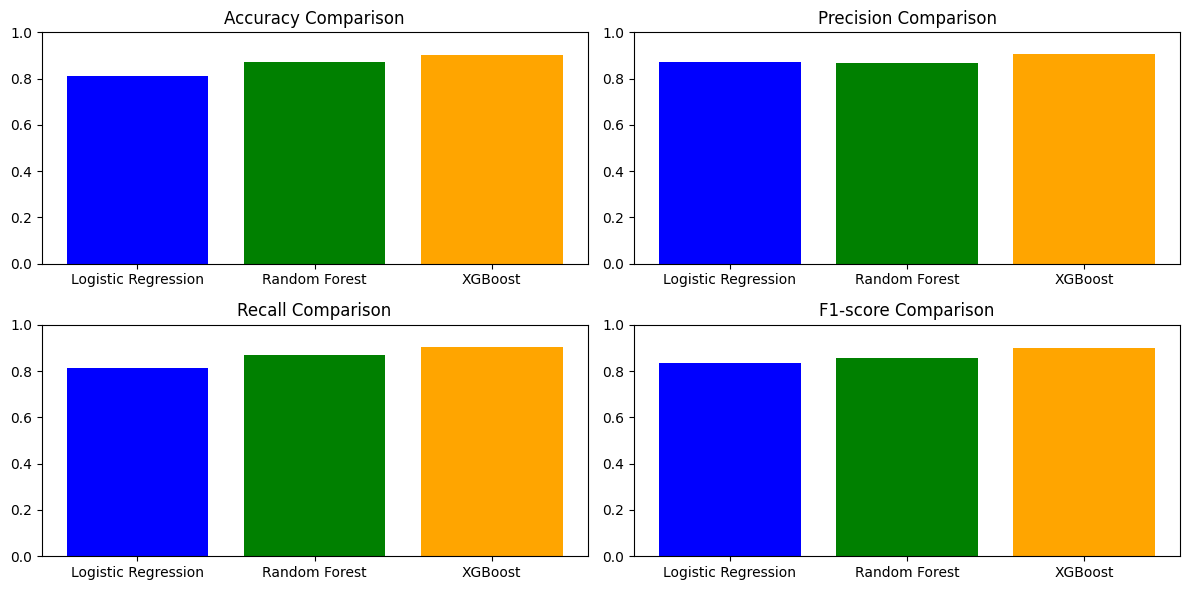

In [ ]:
import matplotlib.pyplot as plt

# Set model names and metric values
models = ["Logistic Regression", "Random Forest", "XGBoost"]
accuracy = performance_df["Accuracy"]
precision = performance_df["Precision"]
recall = performance_df["Recall"]
f1_score_values = performance_df["F1-score"]

# Create bar charts
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.bar(models, accuracy, color=["blue", "green", "orange"])
plt.title("Accuracy Comparison")
plt.ylim(0, 1)

plt.subplot(2, 2, 2)
plt.bar(models, precision, color=["blue", "green", "orange"])
plt.title("Precision Comparison")
plt.ylim(0, 1)

plt.subplot(2, 2, 3)
plt.bar(models, recall, color=["blue", "green", "orange"])
plt.title("Recall Comparison")
plt.ylim(0, 1)

plt.subplot(2, 2, 4)
plt.bar(models, f1_score_values, color=["blue", "green", "orange"])
plt.title("F1-score Comparison")
plt.ylim(0, 1)

plt.tight_layout()
plt.show()



Random Forest Feature Importance:
    Feature  Importance
2      ALB    0.168553
5      AST    0.140055
11    PROT    0.123220
9     CREA    0.093249
6      BIL    0.089680
7      CHE    0.087515
3      ALP    0.073613
0      Age    0.067496
8     CHOL    0.053685
10     GGT    0.053494
4      ALT    0.046251
1      Sex    0.003189


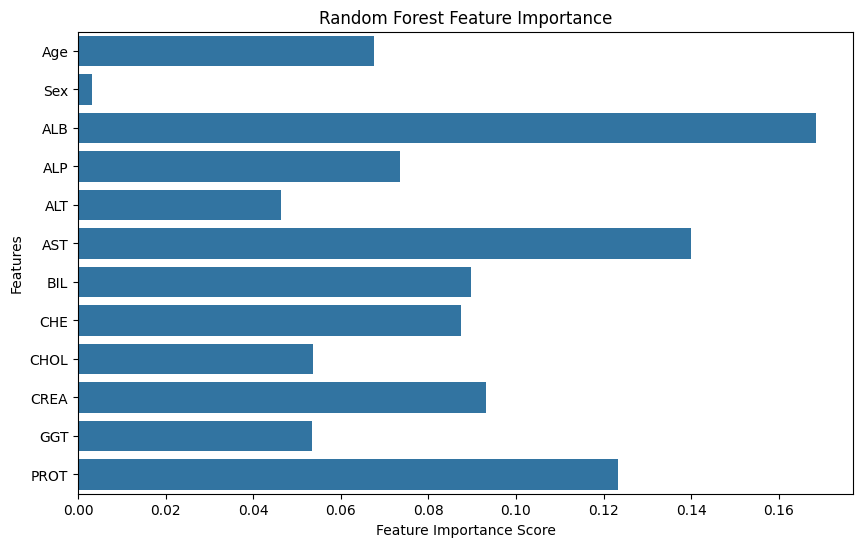

In [ ]:
import seaborn as sns

# Extract feature importance from Random Forest
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Print Feature Importance Table
print("\nRandom Forest Feature Importance:\n", feature_importance_df)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_preds = best_rf.predict(X_test)

# Hyperparameter tuning for XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    param_grid=xgb_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
xgb_preds = best_xgb.predict(X_test)

print("Best RF Parameters:", rf_grid.best_params_)
print("Best XGB Parameters:", xgb_grid.best_params_)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:39:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best RF Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best XGB Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


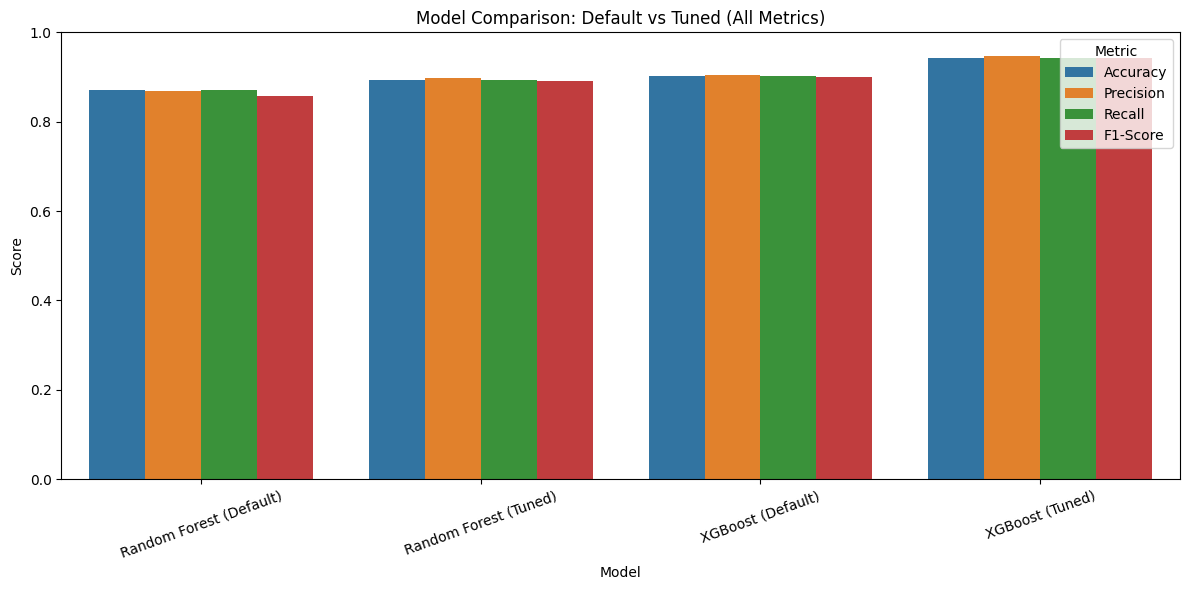

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Metric Comparison
metrics = {
    "Model": [
        "Random Forest (Default)",
        "Random Forest (Tuned)",
        "XGBoost (Default)",
        "XGBoost (Tuned)"
    ],
    "Accuracy": [
        accuracy_score(y_test, rf_pred_default),
        accuracy_score(y_test, rf_preds),
        accuracy_score(y_test, xgb_pred_default),
        accuracy_score(y_test, xgb_preds)
    ],
    "Precision": [
        precision_score(y_test, rf_pred_default, average='weighted', zero_division=0),
        precision_score(y_test, rf_preds, average='weighted', zero_division=0),
        precision_score(y_test, xgb_pred_default, average='weighted', zero_division=0),
        precision_score(y_test, xgb_preds, average='weighted', zero_division=0)
    ],
    "Recall": [
        recall_score(y_test, rf_pred_default, average='weighted', zero_division=0),
        recall_score(y_test, rf_preds, average='weighted', zero_division=0),
        recall_score(y_test, xgb_pred_default, average='weighted', zero_division=0),
        recall_score(y_test, xgb_preds, average='weighted', zero_division=0)
    ],
    "F1-Score": [
        f1_score(y_test, rf_pred_default, average='weighted', zero_division=0),
        f1_score(y_test, rf_preds, average='weighted', zero_division=0),
        f1_score(y_test, xgb_pred_default, average='weighted', zero_division=0),
        f1_score(y_test, xgb_preds, average='weighted', zero_division=0)
    ]
}

# Create DataFrame
metrics_df = pd.DataFrame(metrics)
melted_df = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plot bar chart for comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x="Model", y="Score", hue="Metric")
plt.title("Model Comparison: Default vs Tuned (All Metrics)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()
